In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt                         #Importing Basic visualization package
import seaborn as sns                                   #Importing Advance plotting
from sklearn.model_selection import train_test_split    #Importing train test split

In [2]:
%matplotlib inline               
import warnings                      # to ignore any warnings
warnings.filterwarnings("ignore")

import statsmodels.formula.api as stats
from statsmodels.formula.api import ols
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [3]:
df=pd.read_csv("happiness_score_dataset.csv")   #Loading the data

In [4]:
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [5]:
# Removing irrelevant columns
df.drop(columns=['Standard Error', 'Region', 'Dystopia Residual'], inplace=True)

In [6]:
df

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811
...,...,...,...,...,...,...,...,...,...
153,Rwanda,154,3.465,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628
154,Benin,155,3.340,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260
155,Syria,156,3.006,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179
156,Burundi,157,2.905,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727


In [7]:
#  Reordering the columns

df = df[['Happiness Rank', 'Country', 'Happiness Score', 'Economy (GDP per Capita)', 'Family', 
                 'Health (Life Expectancy)', 'Freedom','Generosity', 'Trust (Government Corruption)']]

In [8]:
df

,Happiness Rank,Country,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption)
0,1,Switzerland,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978
1,2,Iceland,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145
2,3,Denmark,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357
3,4,Norway,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503
4,5,Canada,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957
...,...,...,...,...,...,...,...,...,...
153,154,Rwanda,3.465,0.22208,0.77370,0.42864,0.59201,0.22628,0.55191
154,155,Benin,3.340,0.28665,0.35386,0.31910,0.48450,0.18260,0.08010
155,156,Syria,3.006,0.66320,0.47489,0.72193,0.15684,0.47179,0.18906
156,157,Burundi,2.905,0.01530,0.41587,0.22396,0.11850,0.19727,0.10062


In [9]:
#CHECKING FOR MISSING DATA
df.isnull().any()

Happiness Rank                   False
Country                          False
Happiness Score                  False
Economy (GDP per Capita)         False
Family                           False
Health (Life Expectancy)         False
Freedom                          False
Generosity                       False
Trust (Government Corruption)    False
dtype: bool

In [10]:
df.describe()

,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption)
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.846137,0.991046,0.630259,0.428615,0.237296,0.143422
std,45.754363,1.145010,0.403121,0.272369,0.247078,0.150693,0.126685,0.120034
min,1.000000,2.839000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.250000,4.526000,0.545808,0.856823,0.439185,0.328330,0.150553,0.061675
50%,79.500000,5.232500,0.910245,1.029510,0.696705,0.435515,0.216130,0.107220
75%,118.750000,6.243750,1.158448,1.214405,0.811013,0.549092,0.309883,0.180255
max,158.000000,7.587000,1.690420,1.402230,1.025250,0.669730,0.795880,0.551910


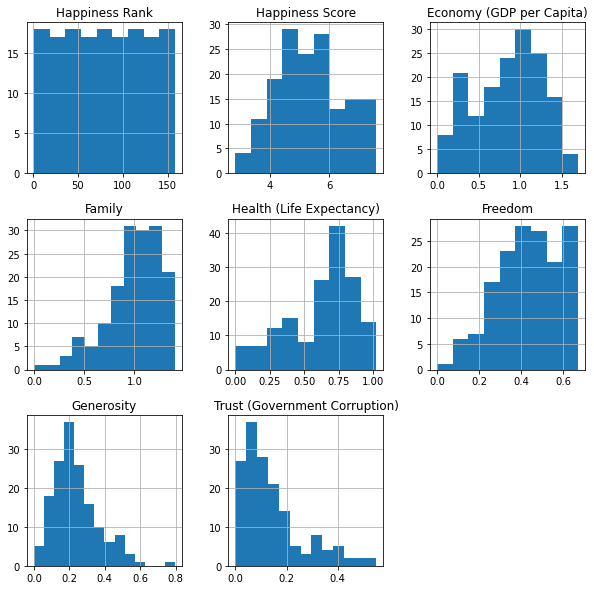

In [11]:
df.hist(bins='auto', figsize=(10,10));    #checking the frequency distribution of the variables

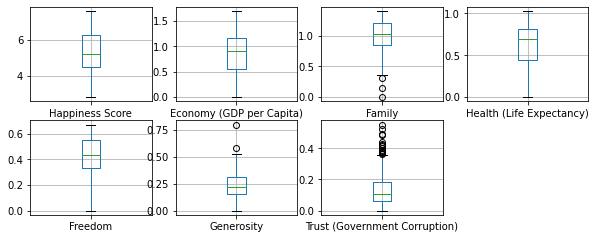

In [12]:
# checking for outliers with boxplots

df[['Happiness Score', 'Economy (GDP per Capita)', 'Family', 
                 'Health (Life Expectancy)', 'Freedom','Generosity',
    'Trust (Government Corruption)']].plot(kind='box', subplots=True, layout=(4,4), figsize=(10,8),grid=True);


#Here outliers are found in Family,Generosity, Trust(Government Corruption)

In [27]:
#checking skewness

df.skew()

Happiness Rank                   0.000418
Happiness Score                  0.097769
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Generosity                       1.001961
Trust (Government Corruption)    1.385463
dtype: float64

<AxesSubplot:xlabel='Happiness Rank', ylabel='Density'>

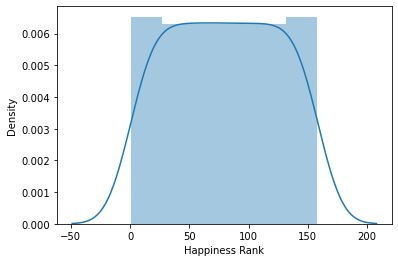

In [29]:
#Normal Distribution

sns.distplot(df['Happiness Rank'])

<AxesSubplot:xlabel='Happiness Score', ylabel='Density'>

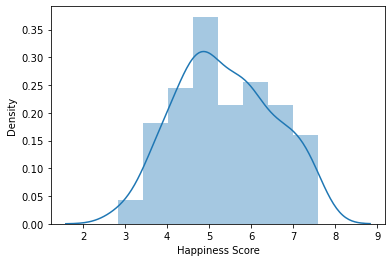

In [30]:
sns.distplot(df['Happiness Score'])

<AxesSubplot:xlabel='Economy (GDP per Capita)', ylabel='Density'>

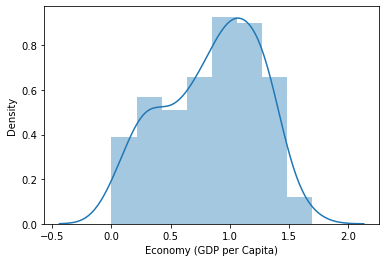

In [31]:
sns.distplot(df['Economy (GDP per Capita)'])

<AxesSubplot:xlabel='Family', ylabel='Density'>

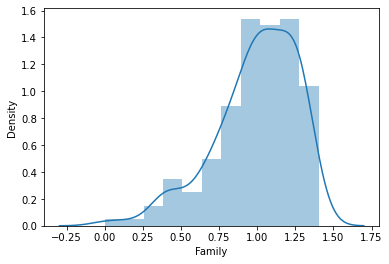

In [32]:
sns.distplot(df['Family'])

<AxesSubplot:xlabel='Health (Life Expectancy)', ylabel='Density'>

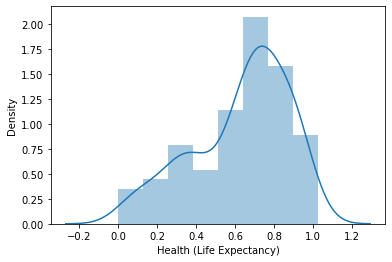

In [33]:
sns.distplot(df['Health (Life Expectancy)'])

<AxesSubplot:xlabel='Freedom', ylabel='Density'>

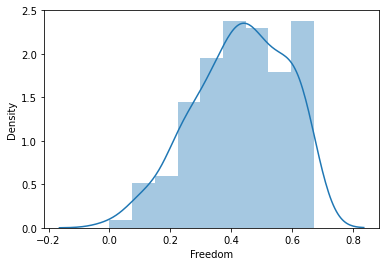

In [34]:
sns.distplot(df['Freedom'])

<AxesSubplot:xlabel='Generosity', ylabel='Density'>

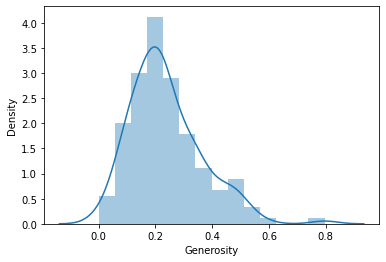

In [35]:
sns.distplot(df['Generosity'])

<AxesSubplot:xlabel='Trust (Government Corruption)', ylabel='Density'>

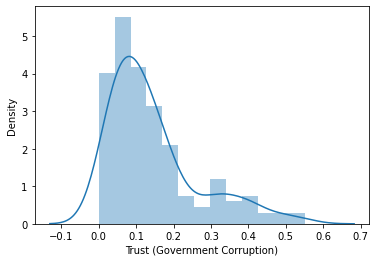

In [36]:
sns.distplot(df['Trust (Government Corruption)'])

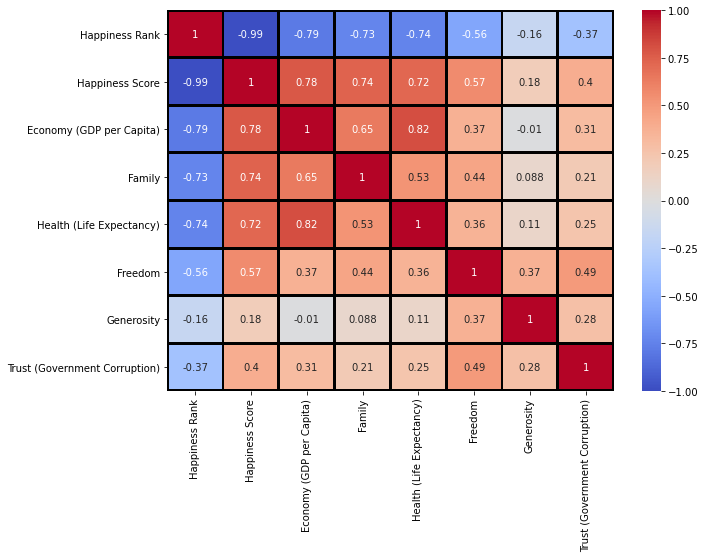

In [41]:
# let's see the correlation between the features using heatmap

plt.figure(figsize=(10, 7))

sns.heatmap(df.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=2, linecolor='black')

plt.show()

In [42]:
#Diving further into relationship between GDP and Health Score

Happiness_Score=df['Happiness Score']      #creating dataframe for health score

GDP=df['Economy (GDP per Capita)']         #creating dataframe for GDP

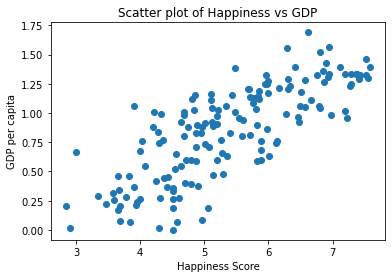

In [43]:
plt.scatter(Happiness_Score, GDP)
plt.title('Scatter plot of Happiness vs GDP')
plt.xlabel('Happiness Score')
plt.ylabel('GDP per capita')
plt.show()

In [44]:
# Checking Countries wit the highest GDP per capita
Rich_countries = df[['Country', 'Economy (GDP per Capita)']].groupby('Country').mean().sort_values(by='Economy (GDP per Capita)', ascending=False)

Rich_countries.head()

,Economy (GDP per Capita)
Country,
Qatar,1.69042
Luxembourg,1.56391
Kuwait,1.55422
Singapore,1.52186
Norway,1.45900


In [45]:
# Checking saddest countries on average
Sad_countries = df[['Country', 'Happiness Rank']].groupby('Country').mean().sort_values(by = 'Happiness Rank', ascending = True)

Sad_countries.tail()

,Happiness Rank
Country,
Rwanda,154
Benin,155
Syria,156
Burundi,157
Togo,158


In [46]:
# Five countries with the highest life expectancy
Healthy_countries = df[['Country', 'Health (Life Expectancy)']].sort_values(by='Health (Life Expectancy)', ascending=False)

Healthy_countries.head()

,Country,Health (Life Expectancy)
23,Singapore,1.02525
71,Hong Kong,1.01328
45,Japan,0.99111
46,South Korea,0.96538
35,Spain,0.95562


In [47]:
# Countries with extremely low life expectancy
low_life_expectancy = df[['Country', 'Health (Life Expectancy)']].sort_values(by='Health (Life Expectancy)', ascending=True)

low_life_expectancy.head()

,Country,Health (Life Expectancy)
122,Sierra Leone,0.00000
127,Botswana,0.04776
147,Central African Republic,0.06699
100,Swaziland,0.07566
96,Lesotho,0.07612


In [48]:
# Dropping irrelevant variables
New_Happiness = df.drop(['Country', 'Happiness Rank'], axis=1)
New_Happiness.head()                                                  #new_happiness.info()

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption)
0,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978
1,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145
2,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357
3,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503
4,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957


In [49]:
# splitting data
from sklearn.model_selection import train_test_split

# features with low corelation has been removed

X = New_Happiness[['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom']]
y = New_Happiness[['Happiness Score']]

# X = features, y = target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [50]:
New_Happiness.describe()

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption)
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,5.375734,0.846137,0.991046,0.630259,0.428615,0.237296,0.143422
std,1.145010,0.403121,0.272369,0.247078,0.150693,0.126685,0.120034
min,2.839000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.526000,0.545808,0.856823,0.439185,0.328330,0.150553,0.061675
50%,5.232500,0.910245,1.029510,0.696705,0.435515,0.216130,0.107220
75%,6.243750,1.158448,1.214405,0.811013,0.549092,0.309883,0.180255
max,7.587000,1.690420,1.402230,1.025250,0.669730,0.795880,0.551910


In [51]:
# Standardizing our data
from sklearn.preprocessing import StandardScaler 

scale = StandardScaler()

New_Happiness = scale.fit_transform(New_Happiness)

In [52]:
#Training the algorithm

from sklearn.linear_model import LinearRegression

lm = LinearRegression()                   # instantiating the model

lm.fit(X_train, y_train)                  # fitting the model with the training dataset

LinearRegression()

In [53]:
y_pred=lm.predict(X_train)

In [54]:
#making a dataframe of the coeffiecients to help us easily determine which variable carries more weight
coefficient = lm.coef_

coefficient_df = pd.DataFrame(list(zip(X.columns, lm.coef_)), columns=['features', 'coefficients'])
coefficient_df

,features,coefficients
0,Economy (GDP per Capita),"[0.9147570367231328, 1.4186785273238531, 0.902..."


In [56]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error as MSE


print('Root Mean Squared Error:', np.sqrt(MSE(y_train, y_pred)))

Root Mean Squared Error: 0.5363949254084994


In [58]:
#Model Saving
import pickle
filename='Happiness Score.pkl'
pickle.dump(lm,open(filename,'wb'))

In [65]:
#Conclusion
a=np.array(y_test)
predicted=np.array(lm.predict(X_test))
df_new=pd.DataFrame({'original':a,'predicted':predicted})